#### download all library before importing. put the names separately

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install re


  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import requests
from bs4 import BeautifulSoup
import pprint as p
import pandas as pd
import numpy as np
import re
pd.options.display.max_columns = None

In [3]:
### pre use define format of data frame
list_ = ['rank', 'player', 'pos', 'age', 'team_id', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', 'field_goals_pct', '3points', '3points_attempts', '3points_pct', '2points', '2points_attempts', '2points_pct', 'efg_pct', 'free_throws', 'free_throws_attempts', 'free_throws_pct', 'orb', 'drb', 'trb', 'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls', 'points_per_game', 'year']
# col_names = player_df.columns
# print(list(col_names))
player_df_final = pd.DataFrame(columns=list_)
player_df_final

,rank,player,pos,age,team_id,games,games_started,min_per_game,field_goals,field_goals_attempts,...,orb,drb,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year


In [ ]:
### check web scraping set up

In [6]:
### get url
for i in range(2010,2020):
    url = (f"https://www.basketball-reference.com/leagues/NBA_{i}_per_game.html")
    print(url)
    response = requests.get(url)  
    html_soup = BeautifulSoup(response.content,"lxml")
    table = html_soup.find('table', {'id':'per_game_stats'})
    tbody = table.find('tbody').find_all('tr')
    player_dict = get_stats(tbody)
    player_df = pd.DataFrame(player_dict)
    player_df['year'] = i
    player_df_final = player_df_final.append(player_df, ignore_index=True)

https://www.basketball-reference.com/leagues/NBA_2010_per_game.html
https://www.basketball-reference.com/leagues/NBA_2011_per_game.html
https://www.basketball-reference.com/leagues/NBA_2012_per_game.html
https://www.basketball-reference.com/leagues/NBA_2013_per_game.html
https://www.basketball-reference.com/leagues/NBA_2014_per_game.html
https://www.basketball-reference.com/leagues/NBA_2015_per_game.html
https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html


In [5]:
def get_stats(tbody):
    player_dict = {'rank':[],'player':[], 'pos':[], 'age':[], 'team_id':[], 'games':[], 'games_started':[], 
               'min_per_game':[], 'field_goals':[], 'field_goals_attempts':[], 'field_goals_pct':[]
              ,'3points':[], '3points_attempts':[], '3points_pct':[],
              '2points':[], '2points_attempts':[], '2points_pct':[], 'efg_pct':[],
              'free_throws':[], 'free_throws_attempts':[], 'free_throws_pct':[],
              'orb':[], 'drb':[], 'trb':[],
              'assists':[], 'steals':[], 'blocks':[], 'turnovers':[], 'personal_fouls':[], 'points_per_game':[] }

    for test in tbody:
        try:

            player_dict['rank'].append(int(test.find('th', {'data-stat':'ranker'}).get_text()))
            player_dict['player'].append(test.find('td', {'data-stat':'player'}).get_text())
            player_dict['pos'].append(test.find('td', {'data-stat':'pos'}).get_text())
            player_dict['age'].append(test.find('td', {'data-stat':'age'}).get_text())
            player_dict['team_id'].append(test.find('td', {'data-stat':'team_id'}).get_text())
            player_dict['games'].append(test.find('td', {'data-stat':'g'}).get_text())
            player_dict['games_started'].append(test.find('td', {'data-stat':'gs'}).get_text())
            player_dict['min_per_game'].append(test.find('td', {'data-stat':'mp_per_g'}).get_text())
            player_dict['field_goals'].append(test.find('td', {'data-stat':'fg_per_g'}).get_text())
            player_dict['field_goals_attempts'].append(test.find('td', {'data-stat':'fga_per_g'}).get_text())
            player_dict['field_goals_pct'].append(test.find('td', {'data-stat':'fg_pct'}).get_text())
            player_dict['3points'].append(test.find('td', {'data-stat':'fg3_per_g'}).get_text())
            player_dict['3points_attempts'].append(test.find('td', {'data-stat':'fg3a_per_g'}).get_text())
            player_dict['3points_pct'].append(test.find('td', {'data-stat':'fg3_pct'}).get_text())
            player_dict['2points'].append(test.find('td', {'data-stat':'fg2_per_g'}).get_text())
            player_dict['2points_attempts'].append(test.find('td', {'data-stat':'fg2a_per_g'}).get_text())
            player_dict['2points_pct'].append(test.find('td', {'data-stat':'fg2_pct'}).get_text())
            player_dict['efg_pct'].append(test.find('td', {'data-stat':'efg_pct'}).get_text())
            player_dict['free_throws'].append(test.find('td', {'data-stat':'ft_per_g'}).get_text())
            player_dict['free_throws_attempts'].append(test.find('td', {'data-stat':'fta_per_g'}).get_text())
            player_dict['free_throws_pct'].append(test.find('td', {'data-stat':'ft_pct'}).get_text())
            player_dict['orb'].append(test.find('td', {'data-stat':'orb_per_g'}).get_text())
            player_dict['drb'].append(test.find('td', {'data-stat':'drb_per_g'}).get_text())
            player_dict['trb'].append(test.find('td', {'data-stat':'trb_per_g'}).get_text())
            player_dict['assists'].append(test.find('td', {'data-stat':'ast_per_g'}).get_text())
            player_dict['steals'].append(test.find('td', {'data-stat':'stl_per_g'}).get_text())
            player_dict['blocks'].append(test.find('td', {'data-stat':'blk_per_g'}).get_text())
            player_dict['turnovers'].append(test.find('td', {'data-stat':'tov_per_g'}).get_text())
            player_dict['personal_fouls'].append(test.find('td', {'data-stat':'pf_per_g'}).get_text())
            player_dict['points_per_game'].append(test.find('td', {'data-stat':'pts_per_g'}).get_text())

        except:
            continue


    return player_dict

In [8]:
player_df_final.to_pickle('player_stats_year_wise.pkl')

In [9]:
player_df_final = pd.read_pickle('player_stats_year_wise.pkl')

In [19]:
player_df_final['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=object)

### get salary data

In [4]:
salary_all_year = pd.read_csv('nba_salaries_1990_to_2018 (1).csv')

In [8]:
salary_2017 = salary_all_year.query('season_start==2017')

In [17]:
salary_2017.head()

,player,salary,season_end,season_start,team,team_name
414,Kent Bazemore,16910113,2018,2017,ATL,Atlanta Hawks
415,Dennis Schroder,15500000,2018,2017,ATL,Atlanta Hawks
416,Miles Plumlee,12500000,2018,2017,ATL,Atlanta Hawks
417,Jamal Crawford,10942762,2018,2017,ATL,Atlanta Hawks
418,Marco Belinelli,6606060,2018,2017,ATL,Atlanta Hawks


In [86]:
player_stat_2017 = player_df_final.query('year==2018')

In [87]:
player_stat_2017.head()

,rank,player,pos,age,team_id,games,games_started,min_per_game,field_goals,field_goals_attempts,...,orb,drb,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year
4762,1,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2018
4763,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2018
4764,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,2018
4765,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,2018
4766,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018


In [88]:
player_stat_2017['pos'].unique()

### SG/PG/PG-SG = back
### other front(PF,C,SF) - front
### SF-SG - special

array(['SG', 'PF', 'C', 'PG', 'SF', 'SF-SG', 'PG-SG'], dtype=object)

In [89]:
#### clean the names
salary_2017[salary_2017['player'].str.contains('russel')]

,player,salary,season_end,season_start,team,team_name
7104,dangelo russell,5562360,2018,2017,NJN,Brooklyn Nets
8198,russell westbrook,28530608,2018,2017,OKC,Oklahoma City Thunder


In [90]:
player_stat_2017['player'] = player_stat_2017['player'].str.replace(r'[^\w\s]', '').str.lower()
salary_2017['player'] = salary_2017['player'].str.replace(r'[^\w\s]', '').str.lower()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
player_stat_2017 = player_stat_2017.merge(salary_2017[['player', 'salary', ]], how = 'left', left_on = 'player', right_on = 'player')

In [92]:
player_stat_2017.head()

,rank,player,pos,age,team_id,games,games_started,min_per_game,field_goals,field_goals_attempts,...,drb,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year,salary
0,1,alex abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2018,5725000.0
1,2,quincy acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2018,1709538.0
2,3,steven adams,C,24,OKC,76,76,32.7,5.9,9.4,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,2018,22471910.0
3,4,bam adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,2018,2490360.0
4,5,arron afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,2328652.0


### check are we missing any important player????

In [93]:
player_stat_2017[player_stat_2017['salary'].notnull()]


,rank,player,pos,age,team_id,games,games_started,min_per_game,field_goals,field_goals_attempts,...,drb,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year,salary
0,1,alex abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2018,5725000.0
1,2,quincy acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2018,1709538.0
2,3,steven adams,C,24,OKC,76,76,32.7,5.9,9.4,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,2018,22471910.0
3,4,bam adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,2018,2490360.0
4,5,arron afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,2328652.0
5,5,arron afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,1500000.0
6,6,cole aldrich,C,29,MIN,21,0,2.3,0.2,0.7,...,0.6,0.7,0.1,0.1,0.0,0.0,0.5,0.6,2018,7300000.0
7,7,lamarcus aldridge,C,32,SAS,75,75,33.5,9.2,18.0,...,5.2,8.5,2.0,0.6,1.2,1.5,2.1,23.1,2018,21461010.0
8,8,jarrett allen,C,19,BRK,72,31,20.0,3.3,5.5,...,3.4,5.4,0.7,0.4,1.2,1.1,2.0,8.2,2018,1713720.0
10,10,tony allen,SF,36,NOP,22,0,12.4,2.0,4.1,...,1.2,2.1,0.4,0.5,0.1,0.9,2.2,4.7,2018,2116955.0


In [94]:
player_stat_2017 = player_stat_2017[player_stat_2017['salary'].notnull()]

In [95]:
player_stat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 682
Data columns (total 32 columns):
rank                    582 non-null object
player                  582 non-null object
pos                     582 non-null object
age                     582 non-null object
team_id                 582 non-null object
games                   582 non-null object
games_started           582 non-null object
min_per_game            582 non-null object
field_goals             582 non-null object
field_goals_attempts    582 non-null object
field_goals_pct         582 non-null object
3points                 582 non-null object
3points_attempts        582 non-null object
3points_pct             582 non-null object
2points                 582 non-null object
2points_attempts        582 non-null object
2points_pct             582 non-null object
efg_pct                 582 non-null object
free_throws             582 non-null object
free_throws_attempts    582 non-null object
free_throws_pct

### check where multiple rows are. take only tot

In [96]:
player_stat_2017[player_stat_2017.duplicated(subset='player', keep=False)].sort_values(by='player')

,rank,player,pos,age,team_id,games,games_started,min_per_game,field_goals,field_goals_attempts,...,drb,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year,salary
605,482,anthony tolliver,PF,32,DET,79,14,22.2,2.8,6.0,...,2.4,3.1,1.1,0.4,0.3,0.7,1.8,8.9,2018,3290000.0
606,482,anthony tolliver,PF,32,DET,79,14,22.2,2.8,6.0,...,2.4,3.1,1.1,0.4,0.3,0.7,1.8,8.9,2018,2000000.0
4,5,arron afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,2328652.0
5,5,arron afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,1500000.0
72,61,avery bradley,SG,27,TOT,46,46,31.2,5.6,13.6,...,2.0,2.5,2.0,1.1,0.2,2.2,2.0,14.3,2018,8808989.0
73,61,avery bradley,SG,27,DET,40,40,31.7,5.8,14.3,...,1.9,2.4,2.1,1.2,0.2,2.3,2.0,15.0,2018,8808989.0
74,61,avery bradley,SG,27,LAC,6,6,27.5,4.3,9.2,...,3.2,3.7,1.8,0.8,0.2,1.3,2.0,9.2,2018,8808989.0
235,191,blake griffin,PF,28,DET,25,25,33.2,7.2,16.7,...,5.6,6.6,6.2,0.4,0.4,2.6,2.4,19.8,2018,29512900.0
233,191,blake griffin,PF,28,TOT,58,58,34.0,7.5,17.2,...,6.1,7.4,5.8,0.7,0.3,2.8,2.4,21.4,2018,29512900.0
234,191,blake griffin,PF,28,LAC,33,33,34.5,7.7,17.5,...,6.5,7.9,5.4,0.9,0.3,3.0,2.4,22.6,2018,29512900.0


,rank,player,pos,age,team_id,games,games_started,min_per_game,field_goals,field_goals_attempts,...,drb,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year,salary
72,61,avery bradley,SG,27,TOT,46,46,31.2,5.6,13.6,...,2.0,2.5,2.0,1.1,0.2,2.2,2.0,14.3,2018,8808989.0
73,61,avery bradley,SG,27,DET,40,40,31.7,5.8,14.3,...,1.9,2.4,2.1,1.2,0.2,2.3,2.0,15.0,2018,8808989.0
74,61,avery bradley,SG,27,LAC,6,6,27.5,4.3,9.2,...,3.2,3.7,1.8,0.8,0.2,1.3,2.0,9.2,2018,8808989.0


In [97]:
player_stat_2017['games'] = player_stat_2017['games'].astype(int)

In [114]:
player_stat_2017.sort_values(by=['player', 'games'], ascending=[True, False], inplace=True)

### changed data set name here

In [101]:
player_stat_1 = player_stat_2017.drop_duplicates(subset='player', keep='first')

In [102]:
player_stat_1[player_stat_1['player'].str.contains('avery')]

,rank,player,pos,age,team_id,games,games_started,min_per_game,field_goals,field_goals_attempts,...,drb,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year,salary
72,61,avery bradley,SG,27,TOT,46,46,31.2,5.6,13.6,...,2.0,2.5,2.0,1.1,0.2,2.2,2.0,14.3,2018,8808989.0


### assign team to player based on maximum games

In [104]:
dup = player_stat_2017[player_stat_2017.duplicated(subset='player', keep=False)].sort_values(by='player')

In [120]:
rem_tot = dup.query('team_id!="TOT"')

In [123]:
rem_tot

,rank,player,pos,age,team_id,games,games_started,min_per_game,field_goals,field_goals_attempts,...,drb,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year,salary
605,482,anthony tolliver,PF,32,DET,79,14,22.2,2.8,6.0,...,2.4,3.1,1.1,0.4,0.3,0.7,1.8,8.9,2018,3290000.0
606,482,anthony tolliver,PF,32,DET,79,14,22.2,2.8,6.0,...,2.4,3.1,1.1,0.4,0.3,0.7,1.8,8.9,2018,2000000.0
4,5,arron afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,2328652.0
5,5,arron afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,1500000.0
73,61,avery bradley,SG,27,DET,40,40,31.7,5.8,14.3,...,1.9,2.4,2.1,1.2,0.2,2.3,2.0,15.0,2018,8808989.0
74,61,avery bradley,SG,27,LAC,6,6,27.5,4.3,9.2,...,3.2,3.7,1.8,0.8,0.2,1.3,2.0,9.2,2018,8808989.0
234,191,blake griffin,PF,28,LAC,33,33,34.5,7.7,17.5,...,6.5,7.9,5.4,0.9,0.3,3.0,2.4,22.6,2018,29512900.0
235,191,blake griffin,PF,28,DET,25,25,33.2,7.2,16.7,...,5.6,6.6,6.2,0.4,0.4,2.6,2.4,19.8,2018,29512900.0
396,313,boban marjanovic,C,29,LAC,20,0,8.3,1.9,3.5,...,2.7,4.4,0.4,0.3,0.3,0.7,1.2,5.9,2018,7000000.0
395,313,boban marjanovic,C,29,DET,19,1,9.0,2.2,4.2,...,2.2,3.0,0.7,0.2,0.3,1.2,1.5,6.2,2018,7000000.0


In [122]:
rem_tot = rem_tot.sort_values(by=['player', 'games'], ascending=[True, False])

In [125]:
rem_tot = rem_tot.drop_duplicates(subset='player', keep='first')

In [126]:
rem_tot

,rank,player,pos,age,team_id,games,games_started,min_per_game,field_goals,field_goals_attempts,...,drb,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year,salary
605,482,anthony tolliver,PF,32,DET,79,14,22.2,2.8,6.0,...,2.4,3.1,1.1,0.4,0.3,0.7,1.8,8.9,2018,3290000.0
4,5,arron afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,2328652.0
73,61,avery bradley,SG,27,DET,40,40,31.7,5.8,14.3,...,1.9,2.4,2.1,1.2,0.2,2.3,2.0,15.0,2018,8808989.0
234,191,blake griffin,PF,28,LAC,33,33,34.5,7.7,17.5,...,6.5,7.9,5.4,0.9,0.3,3.0,2.4,22.6,2018,29512900.0
396,313,boban marjanovic,C,29,LAC,20,0,8.3,1.9,3.5,...,2.7,4.4,0.4,0.3,0.3,0.7,1.2,5.9,2018,7000000.0
668,529,brandan wright,PF,30,MEM,27,1,13.6,2.1,3.7,...,2.3,3.4,0.5,0.5,0.9,0.3,1.1,5.0,2018,5955760.0
641,506,briante weber,PG,25,HOU,13,0,9.1,0.7,1.7,...,1.2,1.4,1.0,0.8,0.2,0.5,1.4,2.0,2018,50000.0
320,255,brice johnson,PF,23,LAC,9,0,4.2,0.8,1.2,...,1.2,1.4,0.1,0.7,0.2,0.4,0.8,1.8,2018,1331160.0
98,81,bruno caboclo,SF,22,SAC,10,0,10.0,0.9,2.9,...,1.4,2.1,0.3,0.2,0.4,0.4,0.7,2.6,2018,2451225.0
207,166,channing frye,C,34,CLE,44,1,12.4,1.9,3.8,...,2.3,2.5,0.6,0.4,0.3,0.4,1.2,4.8,2018,7420912.0


do left join with main data set

In [164]:
player_stat_1 = player_stat_1.merge(rem_tot[['player', 'team_id']], how = 'left', left_on = 'player', right_on='player')

In [165]:
player_stat_1['team_id_y'].fillna(player_stat_1['team_id_x'], inplace= True)

In [166]:
player_stat_1.drop('team_id_x', axis = 1, inplace= True)

In [167]:
player_stat_1.rename(columns={'team_id_y':'team_id'}, inplace=True)

In [168]:
player_stat_1.isna().sum()
### No nulls

rank                    0
player                  0
pos                     0
age                     0
games                   0
games_started           0
min_per_game            0
field_goals             0
field_goals_attempts    0
field_goals_pct         0
3points                 0
3points_attempts        0
3points_pct             0
2points                 0
2points_attempts        0
2points_pct             0
efg_pct                 0
free_throws             0
free_throws_attempts    0
free_throws_pct         0
orb                     0
drb                     0
trb                     0
assists                 0
steals                  0
blocks                  0
turnovers               0
personal_fouls          0
points_per_game         0
year                    0
salary                  0
new_pos                 0
team_id                 0
dtype: int64

### Combine positions

In [169]:
player_stat_1['pos'].unique()

### SG/PG/PG-SG = back
### other front(PF,C,SF) - front
### SF-SG - special. only 2 players with this case
player_stat_1.query('pos=="SF-SG"')

,rank,player,pos,age,games,games_started,min_per_game,field_goals,field_goals_attempts,field_goals_pct,...,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year,salary,new_pos,team_id
62,63,corey brewer,SF-SG,31,72,18,16.8,2.0,4.4,.449,...,0.9,1.1,0.2,0.7,1.9,5.3,2018,7579366.0,special,LAL
375,358,shabazz muhammad,SF-SG,25,43,2,9.7,2.0,4.4,.447,...,0.3,0.2,0.1,0.1,0.7,5.0,2018,1577230.0,special,MIN


In [170]:
### is in doesnot work
player_stat_1['new_pos'] = player_stat_1['pos'].apply(lambda x: 'back' if x in(['SG','PG','PG-SG']) 
                           else ('front' if x in ['PF','C','SF'] else 'special'))

In [171]:
player_stat_1

,rank,player,pos,age,games,games_started,min_per_game,field_goals,field_goals_attempts,field_goals_pct,...,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year,salary,new_pos,team_id
0,65,aaron brooks,PG,33,32,1,5.9,0.9,2.2,.406,...,0.6,0.2,0.0,0.3,0.9,2.3,2018,2116955.0,back,MIN
1,179,aaron gordon,PF,22,58,57,32.9,6.5,14.9,.434,...,2.3,1.0,0.8,1.8,1.9,17.6,2018,5504420.0,front,ORL
2,363,abdel nader,SF,24,48,1,10.9,1.0,3.1,.336,...,0.5,0.3,0.2,0.7,0.9,3.0,2018,1167333.0,front,BOS
3,227,al horford,C,31,72,72,31.6,5.1,10.5,.489,...,4.7,0.6,1.1,1.8,1.9,12.9,2018,27734405.0,front,BOS
4,250,al jefferson,C,33,36,1,13.4,3.1,5.8,.534,...,0.8,0.4,0.6,0.6,1.8,7.0,2018,9769821.0,front,IND
5,517,alan williams,PF,25,5,0,14.0,1.4,3.6,.389,...,1.6,1.0,0.2,1.4,2.6,4.0,2018,6000000.0,front,PHO
6,78,alec burks,SG,26,64,1,16.5,2.7,6.5,.411,...,1.0,0.6,0.1,0.9,1.2,7.7,2018,10845506.0,back,UTA
7,1,alex abrines,SG,24,75,8,15.1,1.5,3.9,.395,...,0.4,0.5,0.1,0.3,1.7,4.7,2018,5725000.0,back,OKC
8,292,alex len,C,24,69,13,20.2,3.1,5.5,.566,...,1.2,0.4,0.9,1.1,2.3,8.5,2018,4187599.0,front,PHO
9,11,alfarouq aminu,PF,27,69,67,30.0,3.3,8.4,.395,...,1.2,1.1,0.6,1.1,2.0,9.3,2018,7319035.0,front,POR


### Get team ranking

In [3]:
team_rank = pd.read_csv('team_rank.csv')


In [182]:
source = team_rank['team_id'].unique()
dest = player_stat_1['team_id'].unique()

check = [i for i in source if i not in dest]
check

[]

In [184]:
player_stat_1 = player_stat_1.merge(team_rank, how = 'left', left_on='team_id', right_on='team_id')

In [196]:
player_stat_1.rename(columns={'rank_x':'player_rank', 'rank_y':'team_rank', 'points':'team_points'}, inplace=True)

In [197]:
player_stat_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 36 columns):
player_rank             449 non-null object
player                  449 non-null object
pos                     449 non-null object
age                     449 non-null object
games                   449 non-null int64
games_started           449 non-null object
min_per_game            449 non-null object
field_goals             449 non-null object
field_goals_attempts    449 non-null object
field_goals_pct         449 non-null object
3points                 449 non-null object
3points_attempts        449 non-null object
3points_pct             449 non-null object
2points                 449 non-null object
2points_attempts        449 non-null object
2points_pct             449 non-null object
efg_pct                 449 non-null object
free_throws             449 non-null object
free_throws_attempts    449 non-null object
free_throws_pct         449 non-null object
orb             

### convert to int and float

In [199]:
player_stat_1.columns

Index(['player_rank', 'player', 'pos', 'age', 'games', 'games_started',
       'min_per_game', 'field_goals', 'field_goals_attempts',
       'field_goals_pct', '3points', '3points_attempts', '3points_pct',
       '2points', '2points_attempts', '2points_pct', 'efg_pct', 'free_throws',
       'free_throws_attempts', 'free_throws_pct', 'orb', 'drb', 'trb',
       'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls',
       'points_per_game', 'year', 'salary', 'new_pos', 'team_id',
       'team_points', 'team', 'team_rank'],
      dtype='object')

In [207]:
int_col = ['age',  'games', 'games_started', 'team_rank']
float_col = ['min_per_game', 'field_goals', 'field_goals_attempts',
       'field_goals_pct', '3points', '3points_attempts', '3points_pct',
       '2points', '2points_attempts', '2points_pct', 'efg_pct', 'free_throws',
       'free_throws_attempts', 'free_throws_pct', 'orb', 'drb', 'trb',
            'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls',
       'points_per_game', 'team_points']

In [208]:
player_stat_1[int_col] = player_stat_1[int_col].apply(pd.to_numeric, axis = 1)
player_stat_1[float_col] = player_stat_1[float_col].apply(pd.to_numeric, axis = 1)

In [209]:
player_stat_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 36 columns):
player_rank             449 non-null object
player                  449 non-null object
pos                     449 non-null object
age                     449 non-null int64
games                   449 non-null int64
games_started           449 non-null int64
min_per_game            449 non-null float64
field_goals             449 non-null float64
field_goals_attempts    449 non-null float64
field_goals_pct         448 non-null float64
3points                 449 non-null float64
3points_attempts        449 non-null float64
3points_pct             415 non-null float64
2points                 449 non-null float64
2points_attempts        449 non-null float64
2points_pct             444 non-null float64
efg_pct                 448 non-null float64
free_throws             449 non-null float64
free_throws_attempts    449 non-null float64
free_throws_pct         436 non-null float64
orb 

In [210]:
player_stat_1

,player_rank,player,pos,age,games,games_started,min_per_game,field_goals,field_goals_attempts,field_goals_pct,3points,3points_attempts,3points_pct,2points,2points_attempts,2points_pct,efg_pct,free_throws,free_throws_attempts,free_throws_pct,orb,drb,trb,assists,steals,blocks,turnovers,personal_fouls,points_per_game,year,salary,new_pos,team_id,team_points,team,team_rank
0,65,aaron brooks,PG,33,32,1,5.9,0.9,2.2,0.406,0.3,1.0,0.355,0.5,1.2,0.447,0.486,0.3,0.3,0.727,0.2,0.3,0.5,0.6,0.2,0.0,0.3,0.9,2.3,2018,2116955.0,back,MIN,0.573,Minnesota Timberwolves,13
1,179,aaron gordon,PF,22,58,57,32.9,6.5,14.9,0.434,2.0,5.9,0.336,4.5,9.0,0.497,0.500,2.7,3.9,0.698,1.5,6.4,7.9,2.3,1.0,0.8,1.8,1.9,17.6,2018,5504420.0,front,ORL,0.305,Orlando Magic,26
2,363,abdel nader,SF,24,48,1,10.9,1.0,3.1,0.336,0.5,1.4,0.354,0.6,1.8,0.321,0.413,0.5,0.8,0.590,0.3,1.2,1.5,0.5,0.3,0.2,0.7,0.9,3.0,2018,1167333.0,front,BOS,0.671,Boston Celtics,4
3,227,al horford,C,31,72,72,31.6,5.1,10.5,0.489,1.3,3.1,0.429,3.8,7.3,0.514,0.553,1.3,1.7,0.783,1.4,5.9,7.4,4.7,0.6,1.1,1.8,1.9,12.9,2018,27734405.0,front,BOS,0.671,Boston Celtics,4
4,250,al jefferson,C,33,36,1,13.4,3.1,5.8,0.534,0.0,0.1,0.000,3.1,5.7,0.541,0.534,0.8,1.0,0.833,0.8,3.1,4.0,0.8,0.4,0.6,0.6,1.8,7.0,2018,9769821.0,front,IND,0.585,Indiana Pacers,11
5,517,alan williams,PF,25,5,0,14.0,1.4,3.6,0.389,0.0,0.0,NaN,1.4,3.6,0.389,0.389,1.2,1.8,0.667,0.6,3.8,4.4,1.6,1.0,0.2,1.4,2.6,4.0,2018,6000000.0,front,PHO,0.256,Phoenix Suns,30
6,78,alec burks,SG,26,64,1,16.5,2.7,6.5,0.411,0.7,2.2,0.331,1.9,4.3,0.452,0.467,1.7,1.9,0.863,0.3,2.7,3.0,1.0,0.6,0.1,0.9,1.2,7.7,2018,10845506.0,back,UTA,0.585,Utah Jazz,9
7,1,alex abrines,SG,24,75,8,15.1,1.5,3.9,0.395,1.1,2.9,0.380,0.4,0.9,0.443,0.540,0.5,0.6,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2018,5725000.0,back,OKC,0.585,Oklahoma City Thunder,8
8,292,alex len,C,24,69,13,20.2,3.1,5.5,0.566,0.0,0.0,0.333,3.1,5.4,0.568,0.567,2.3,3.3,0.684,2.5,5.0,7.5,1.2,0.4,0.9,1.1,2.3,8.5,2018,4187599.0,front,PHO,0.256,Phoenix Suns,30
9,11,alfarouq aminu,PF,27,69,67,30.0,3.3,8.4,0.395,1.8,4.9,0.369,1.5,3.5,0.432,0.503,0.9,1.2,0.738,1.4,6.2,7.6,1.2,1.1,0.6,1.1,2.0,9.3,2018,7319035.0,front,POR,0.598,Portland Trail Blazers,7


In [211]:
player_stat_1.to_pickle('tfa_working_ver_1')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
All_data = pd.read_pickle('tfa_working_ver_1')
All_data

,player_rank,player,pos,age,games,games_started,min_per_game,field_goals,field_goals_attempts,field_goals_pct,...,turnovers,personal_fouls,points_per_game,year,salary,new_pos,team_id,team_points,team,team_rank
0,65,aaron brooks,PG,33,32,1,5.9,0.9,2.2,0.406,...,0.3,0.9,2.3,2018,2116955.0,back,MIN,0.573,Minnesota Timberwolves,13
1,179,aaron gordon,PF,22,58,57,32.9,6.5,14.9,0.434,...,1.8,1.9,17.6,2018,5504420.0,front,ORL,0.305,Orlando Magic,26
2,363,abdel nader,SF,24,48,1,10.9,1.0,3.1,0.336,...,0.7,0.9,3.0,2018,1167333.0,front,BOS,0.671,Boston Celtics,4
3,227,al horford,C,31,72,72,31.6,5.1,10.5,0.489,...,1.8,1.9,12.9,2018,27734405.0,front,BOS,0.671,Boston Celtics,4
4,250,al jefferson,C,33,36,1,13.4,3.1,5.8,0.534,...,0.6,1.8,7.0,2018,9769821.0,front,IND,0.585,Indiana Pacers,11
5,517,alan williams,PF,25,5,0,14.0,1.4,3.6,0.389,...,1.4,2.6,4.0,2018,6000000.0,front,PHO,0.256,Phoenix Suns,30
6,78,alec burks,SG,26,64,1,16.5,2.7,6.5,0.411,...,0.9,1.2,7.7,2018,10845506.0,back,UTA,0.585,Utah Jazz,9
7,1,alex abrines,SG,24,75,8,15.1,1.5,3.9,0.395,...,0.3,1.7,4.7,2018,5725000.0,back,OKC,0.585,Oklahoma City Thunder,8
8,292,alex len,C,24,69,13,20.2,3.1,5.5,0.566,...,1.1,2.3,8.5,2018,4187599.0,front,PHO,0.256,Phoenix Suns,30
9,11,alfarouq aminu,PF,27,69,67,30.0,3.3,8.4,0.395,...,1.1,2.0,9.3,2018,7319035.0,front,POR,0.598,Portland Trail Blazers,7


In [2]:
list(All_data.columns.values)

['player_rank',
 'player',
 'pos',
 'age',
 'games',
 'games_started',
 'min_per_game',
 'field_goals',
 'field_goals_attempts',
 'field_goals_pct',
 '3points',
 '3points_attempts',
 '3points_pct',
 '2points',
 '2points_attempts',
 '2points_pct',
 'efg_pct',
 'free_throws',
 'free_throws_attempts',
 'free_throws_pct',
 'orb',
 'drb',
 'trb',
 'assists',
 'steals',
 'blocks',
 'turnovers',
 'personal_fouls',
 'points_per_game',
 'year',
 'salary',
 'new_pos',
 'team_id',
 'team_points',
 'team',
 'team_rank']

In [3]:
All_data
All_data['Position_back']=np.where((All_data['new_pos']=='back'),1,0)
All_data['Position_front']=np.where((All_data['new_pos']=='front'),1,0)
All_data[All_data['new_pos']=='special']

# X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
#               '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
#               'turnovers', 'personal_fouls', 'points_per_game', 'team_points']] 
# import seaborn as sb
# sb.pairplot(X)

,player_rank,player,pos,age,games,games_started,min_per_game,field_goals,field_goals_attempts,field_goals_pct,...,points_per_game,year,salary,new_pos,team_id,team_points,team,team_rank,Position_back,Position_front
62,63,corey brewer,SF-SG,31,72,18,16.8,2.0,4.4,0.449,...,5.3,2018,7579366.0,special,LAL,0.427,Los Angeles Lakers,21,0,0
375,358,shabazz muhammad,SF-SG,25,43,2,9.7,2.0,4.4,0.447,...,5.0,2018,1577230.0,special,MIN,0.573,Minnesota Timberwolves,13,0,0


In [4]:
# Linear regression on variables with no missing values
# Note that some columns have missing values 
# '3points_pct', '2points_pct', 'efg_pct', 'personal_fouls'

import statsmodels.api as sm

X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]  ## independent variables

y = All_data['salary']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     26.13
Date:                Fri, 30 Nov 2018   Prob (F-statistic):           2.71e-65
Time:                        23:47:45   Log-Likelihood:                -7549.9
No. Observations:                 449   AIC:                         1.515e+04
Df Residuals:                     426   BIC:                         1.524e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.214e+07   1.88e+06     -6.465      0.000   -1.58e+07   -8.45e+06
age                   5.119e+05   5.67e+04      9.028      0.000       4e+05    6.23e+05
games                -7.464e+04   1.41e+04     -5.302      0.000   -1.02e+05    -4.7e+04
games_started          7.23e+04   1.48e+04      4.874      0.000    4.31e+04    1.01e+05
min_per_game           8.79e+04   9.95e+04      0.883      0.378   -1.08e+05    2.84e+05
field_goals            1.12e+07    7.9e+06      1.417      0.157   -4.33e+06    2.67e+07
field_goals_attempts -3.187e+04   5.08e+06     -0.006      0.995      -1e+07    9.96e+06
2points              -9.358e+06    5.6e+06     -1.671      0.096   -2.04e+07    1.65e+06
2points_attempts     -8.188e+05   5.04e+06     -0.162      0.871   -1.07e+07    9.09e+06
3points              -1.243e+07   6.97e+06     -1.782      0.075   -2.61e+07    1.28e+06
3points_attempts      1.065e+06   5.09e+06      0.209      0.834   -8.94e+06    1.11e+07
free_throws           3.921e+05   3.46e+06      0.113      0.910   -6.41e+06     7.2e+06
orb                  -5.105e+06   5.03e+06     -1.015      0.311    -1.5e+07    4.78e+06
drb                  -6.252e+06   4.96e+06     -1.260      0.208    -1.6e+07     3.5e+06
trb                   6.493e+06   4.95e+06      1.311      0.190   -3.24e+06    1.62e+07
assists               6.569e+05   3.02e+05      2.173      0.030    6.28e+04    1.25e+06
steals               -3.001e+05   8.95e+05     -0.335      0.738   -2.06e+06    1.46e+06
blocks                5.862e+05   9.18e+05      0.638      0.524   -1.22e+06    2.39e+06
free_throws_attempts  7.977e+05    1.1e+06      0.726      0.468   -1.36e+06    2.96e+06
turnovers            -1.589e+06   8.87e+05     -1.791      0.074   -3.33e+06    1.55e+05
personal_fouls       -8.489e+05   6.25e+05     -1.358      0.175   -2.08e+06     3.8e+05
points_per_game       5.216e+04   3.36e+06      0.016      0.988   -6.54e+06    6.65e+06
team_points           4.014e+06   1.71e+06      2.342      0.020    6.45e+05    7.38e+06
==============================================================================
Omnibus:                       33.986   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.287
Skew:                           0.496   Prob(JB):                     2.20e-13
Kurtosis:                       4.459   Cond. No.                     3.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
# Linear regression on variables that I think are good ones qualitatively


import statsmodels.api as sm

X = All_data[['age', 'games', 'games_started', 'min_per_game', '3points', 'field_goals', 'orb', \
              'free_throws_attempts', 'blocks', 'points_per_game','Position_back','Position_front','min_per_game','personal_fouls']]  ## independent variables

y = All_data['salary']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     41.03
Date:                Fri, 30 Nov 2018   Prob (F-statistic):           2.64e-67
Time:                        23:49:42   Log-Likelihood:                -7562.0
No. Observations:                 449   AIC:                         1.515e+04
Df Residuals:                     435   BIC:                         1.521e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.086e+07   3.98e+06     -2.727      0.007   -1.87e+07   -3.03e+06
age                   5.519e+05   5.58e+04      9.898      0.000    4.42e+05    6.62e+05
games                -6.107e+04   1.35e+04     -4.517      0.000   -8.76e+04   -3.45e+04
games_started         7.349e+04    1.5e+04      4.887      0.000    4.39e+04    1.03e+05
min_per_game          4.878e+04    4.4e+04      1.108      0.269   -3.78e+04    1.35e+05
3points               1.241e+06   1.45e+06      0.855      0.393   -1.61e+06    4.09e+06
field_goals           5.396e+05    2.5e+06      0.216      0.829   -4.37e+06    5.45e+06
orb                   1.398e+06   5.65e+05      2.473      0.014    2.87e+05    2.51e+06
free_throws_attempts  1.239e+06   1.04e+06      1.191      0.234   -8.06e+05    3.28e+06
blocks                6.821e+05   8.85e+05      0.770      0.441   -1.06e+06    2.42e+06
points_per_game      -1.009e+05   1.23e+06     -0.082      0.934   -2.51e+06    2.31e+06
Position_back        -6.795e+05   3.63e+06     -0.187      0.852   -7.81e+06    6.45e+06
Position_front       -1.361e+05   3.62e+06     -0.038      0.970   -7.26e+06    6.99e+06
min_per_game          4.878e+04    4.4e+04      1.108      0.269   -3.78e+04    1.35e+05
personal_fouls       -1.447e+06   5.66e+05     -2.556      0.011   -2.56e+06   -3.34e+05
==============================================================================
Omnibus:                       43.749   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.531
Skew:                           0.580   Prob(JB):                     7.27e-19
Kurtosis:                       4.766   Cond. No.                     2.81e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
#pip install yellowbrick
!python -m pip install yellowbrick
#! pip install -m yellowbrick

In [9]:
from sklearn.model_selection import train_test_split

# Specify the features of interest and the target

# Extract the instances and target
X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]
y = All_data['salary'] 

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


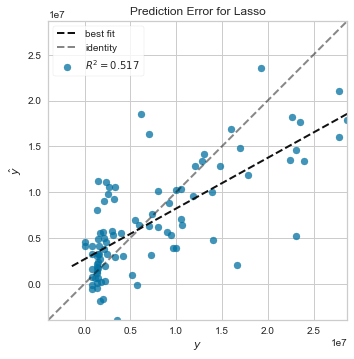

In [10]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

135 135
linear regression train score: 0.5604363433994224
linear regression test score: 0.5831415345920439
ridge regression train score low alpha: 0.5604200249625926
ridge regression test score low alpha: 0.5836999123214051
ridge regression train score high alpha: 0.5359601055642469
ridge regression test score high alpha: 0.5847498590458193


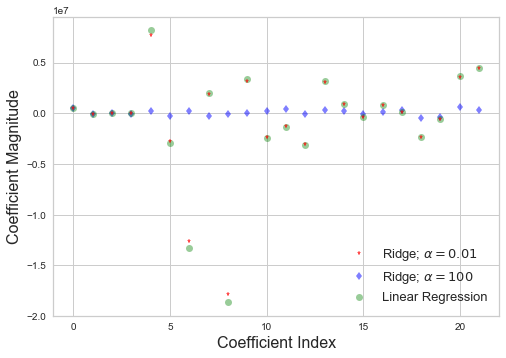

In [11]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

newX = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]

newY = All_data['salary'] 


#print type(newY)# pandas core frame

X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ( "linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()


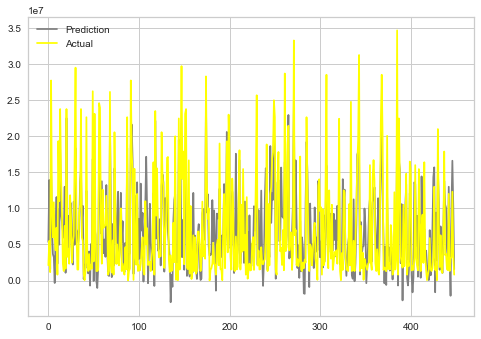

In [12]:
import matplotlib.pyplot as plt 
k=predictions.astype(int)
plt.plot(k ,label = "Prediction",color='grey')
plt.plot(y ,label='Actual',color='yellow')
plt.legend() 

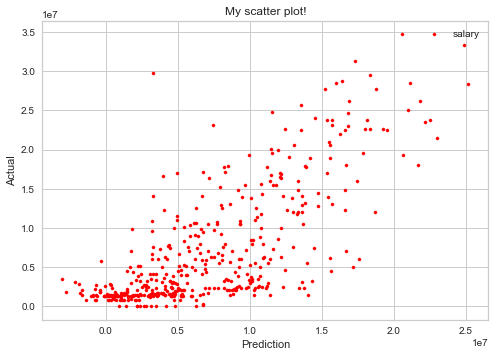

In [13]:
plt.scatter(k,y,label = "salary",color='red',s=10)
# x-axis label 
plt.xlabel('Prediction') 
# frequency label 
plt.ylabel('Actual') 
# plot title 
plt.title('My scatter plot!') 
# showing legend 
plt.legend() 